## Netflix Put Option

## Installing packages and libraries to pull the data 

In [73]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [193]:
pip install option-price

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import matplotlib as mpl
import scipy.stats as si
import matplotlib.pyplot as plt
import seaborn as sns
from optionprice import Option
from datetime import datetime
import os
from mpl_toolkits.mplot3d import Axes3D

## Stock data

#### S&P 500 Index for the period from Jan to Oct 2020

In [4]:
data = yf.download("NFLX", start="2020-01-01", end="2020-10-30")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100
2020-10-27,490.010010,490.489990,482.929993,488.929993,488.929993,3627200
2020-10-28,486.359985,494.000000,483.279999,486.239990,486.239990,5992700
2020-10-29,488.500000,513.900024,479.339996,504.209991,504.209991,11120700


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-01-02 to 2020-10-29
Data columns (total 6 columns):
Open         210 non-null float64
High         210 non-null float64
Low          210 non-null float64
Close        210 non-null float64
Adj Close    210 non-null float64
Volume       210 non-null int64
dtypes: float64(5), int64(1)
memory usage: 11.5 KB


array([<AxesSubplot:xlabel='Date'>], dtype=object)

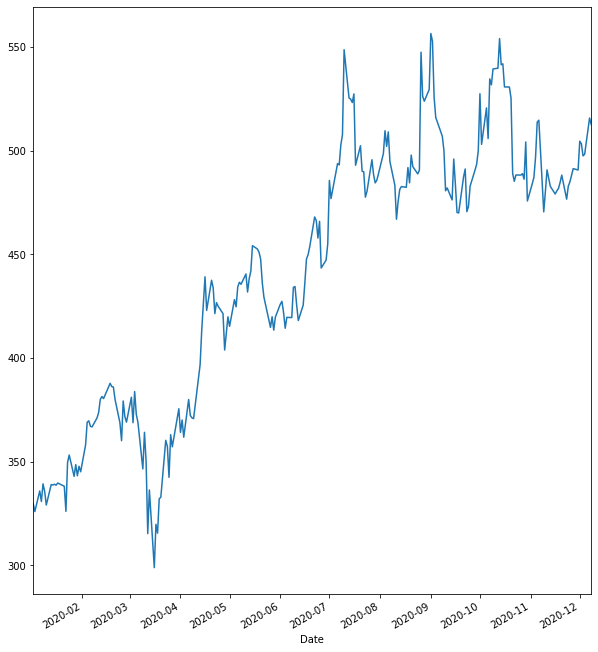

In [85]:
ADJ.plot(figsize=(10, 12), subplots=True)

### Volatility and Log Return Calculation

In [86]:
Log_ret = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
Vol = Log_ret.std() * np.sqrt(238)
print('Annualised volatility is', round(Vol*100,2),'%')

Annualised volatility is 45.91 %


In [11]:
Log_ret = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
Log_ret

Date
2020-01-02         NaN
2020-01-03   -0.011926
2020-01-06    0.030014
2020-01-07   -0.015242
2020-01-08    0.025404
                ...   
2020-10-23    0.006266
2020-10-26   -0.000082
2020-10-27    0.001412
2020-10-28   -0.005517
2020-10-29    0.036291
Name: Adj Close, Length: 210, dtype: float64

In [14]:
dff=pd.concat([data['Adj Close'],Log_ret], axis=1)
dff.columns=['Price','Return']
dff

,Price,Return
Date,,
2020-01-02,329.809998,NaN
2020-01-03,325.899994,-0.011926
2020-01-06,335.829987,0.030014
2020-01-07,330.750000,-0.015242
2020-01-08,339.260010,0.025404
...,...,...
2020-10-23,488.279999,0.006266
2020-10-26,488.239990,-0.000082
2020-10-27,488.929993,0.001412


In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-01-02 to 2020-10-29
Data columns (total 2 columns):
Price     210 non-null float64
Return    209 non-null float64
dtypes: float64(2)
memory usage: 4.9 KB


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

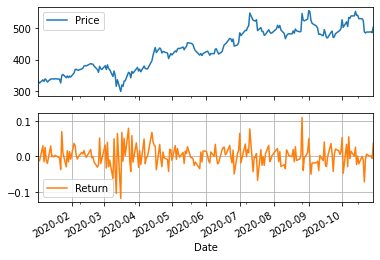

In [16]:
dff.plot(subplots=4)
plt.grid()

## Black-Scholes Model

#### Non-Dividend Paying Options

In [156]:
NFLX = yf.Ticker("NFLX")
opt = NFLX.option_chain('2020-12-24')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NFLX201224P00250000,2020-11-16 05:10:54,250.0,0.10,NaN,0.28,0.0,0.0,NaN,1,1.608400,False,REGULAR,USD
1,NFLX201224P00265000,2020-11-27 17:46:11,265.0,0.07,0.00,0.28,0.0,0.0,1.0,1,1.371097,False,REGULAR,USD
2,NFLX201224P00285000,2020-12-02 16:12:53,285.0,0.12,0.00,0.27,0.0,0.0,2.0,3,1.220707,False,REGULAR,USD
3,NFLX201224P00290000,2020-12-01 20:23:43,290.0,0.07,0.00,0.27,0.0,0.0,NaN,1,1.185551,False,REGULAR,USD
4,NFLX201224P00295000,2020-11-24 20:01:15,295.0,0.13,0.00,0.27,0.0,0.0,NaN,1,1.152348,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NFLX201224P00600000,2020-12-07 17:34:17,600.0,85.40,96.20,99.15,0.0,0.0,1.0,7,0.554936,True,REGULAR,USD
71,NFLX201224P00620000,2020-11-18 20:31:05,620.0,134.50,116.05,119.10,0.0,0.0,NaN,6,0.622807,True,REGULAR,USD
72,NFLX201224P00630000,2020-12-07 16:23:13,630.0,117.50,126.00,128.90,0.0,0.0,NaN,1,0.642582,True,REGULAR,USD
73,NFLX201224P00680000,2020-11-30 17:43:12,680.0,193.54,175.30,179.25,0.0,0.0,2.0,1,0.780764,True,REGULAR,USD


#### Finding the variables:

In [360]:
K = opt.puts['strike'].iloc[-1]
K 

730.0

#### U.S. Risk Free Rates

In [361]:
from pandas_datareader.data import DataReader as dr
syms = ['DGS10', 'DGS5', 'DGS2', 'DGS1MO', 'DGS3MO']
yc = dr(syms, 'fred') 
names = dict(zip(syms, ['10yr', '5yr', '2yr', '1m', '3m']))
yc = yc.rename(columns=names)
yc = yc[['1m', '3m', '2yr', '5yr', '10yr']]
print(yc)

              1m    3m   2yr   5yr  10yr
DATE                                    
2015-12-15  0.21  0.25  0.98  1.71  2.28
2015-12-16  0.20  0.27  1.02  1.75  2.30
2015-12-17  0.18  0.23  1.00  1.73  2.24
2015-12-18  0.16  0.19  0.97  1.67  2.19
2015-12-21  0.14  0.24  0.96  1.67  2.20
...          ...   ...   ...   ...   ...
2020-12-04  0.07  0.09  0.16  0.42  0.97
2020-12-07  0.09  0.08  0.14  0.40  0.94
2020-12-08  0.08  0.09  0.14  0.39  0.92
2020-12-09  0.07  0.08  0.16  0.41  0.95
2020-12-10  0.07  0.08  0.14  0.39  0.92

[1303 rows x 5 columns]


In [362]:
r = yc['10yr'].iloc[-1]
r

0.92

In [363]:
S = data['Adj Close'][-1] 
S

504.2099914550781

In [364]:
Vol

0.4591013138482463

In [365]:
T = 55/365
T

0.1506849315068493

In [366]:
sigma = Vol
sigma

0.4591013138482463

In [367]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: U.S. risk free rate
    #vol: volatility of underlying asset
    #payoff: put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value
        

In [368]:
euro_option_bs(S, K, T, r, sigma, "put")

135.88586683650152

In [369]:
S = np.linspace(100,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], K, T, r, sigma, "put")

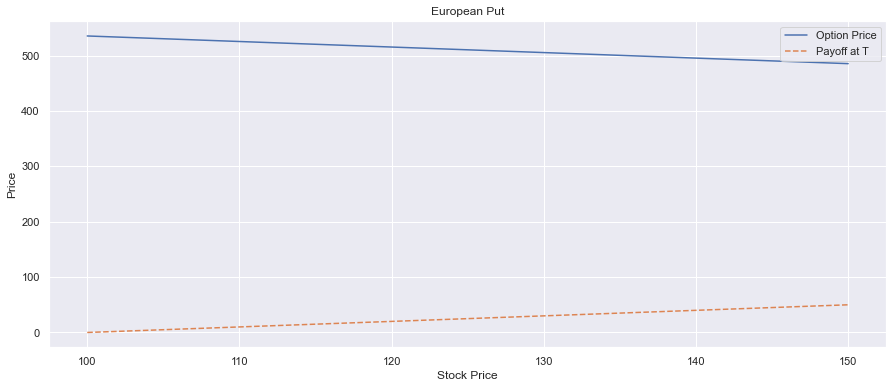

In [370]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

## Analysis - Greeks of Non-Dividend Paying Assets

### Delta

In [381]:
def delta_put(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "put":
        delta_put = -si.norm.cdf(-d1, 0.0, 1.0)
        
    return delta_put

In [382]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, sigma, 'put')

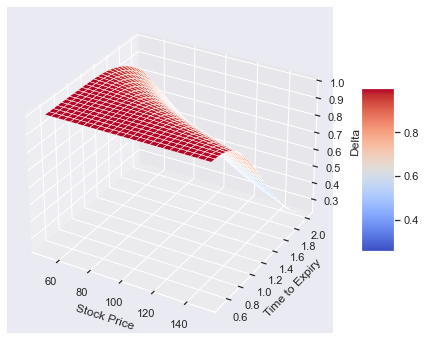

In [383]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [391]:
d = delta_put(504.201, 730.00, 55/365, 0.0092, 0.04591, 'put')
print('The value of Delta is', d,'.','For each $1 increase in the price of the underlying asset, the price of the put option  will decrease by $', d, '.')

The value of Delta is -1.0 . For each $1 increase in the price of the underlying asset, the price of the put option  will decrease by $ -1.0 .


### Gamma

In [326]:
def gamma(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [327]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, sigma, 'put')

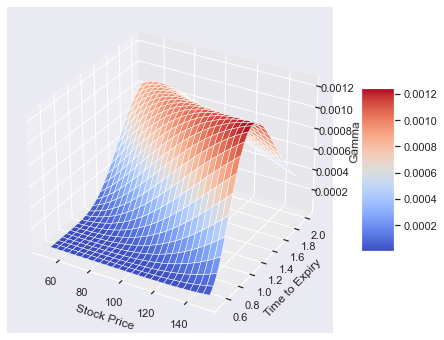

In [328]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [396]:
gamma(504.21, 730, 55/365, 0.0092, 0.04591, 'put')

1.6304825153364788e-94

### Vega

In [330]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [411]:
v = vega(504.21, 730.00, 55/365, 0.0092, 0.04591, 'put')
print(v)

1.114687545897821e-91


### Theta

In [408]:
def theta(S, K, T, r, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1 ** 2 * 0.5)
    
    if option == 'call':
        theta = (-sigma * S * prob_density) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    if option == 'put':    
        theta = (-sigma * S * prob_density) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [409]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], r, sigma, 'put')

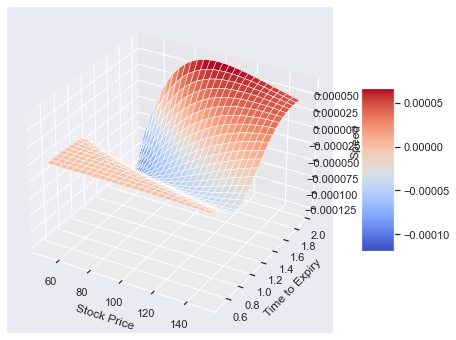

In [410]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [412]:
theta(504.21, 730.00, 55/365, 0.0092, 0.4591, option = 'put')

-10.163482191809674

### Rho

In [342]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [343]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], K, T[i], r, sigma, 'put')

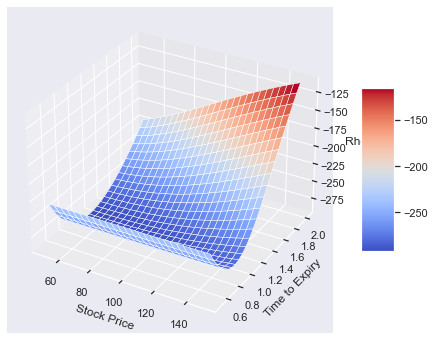

In [344]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [347]:
rho(504.21, 730.00, 55/365, 0.0092, 0.04591, 'put')

-109.84761250121949

## Monte Carlo Simulation

In [399]:
euro_option_mc = Option(european=True,
                    kind='put',
                    s0=504.2099914550781,
                    k=730,
                    sigma=0.4591013138482463,
                    r=0.0092,
                    start=datetime(2020,10,30),
                    end=datetime(2020,12,24),
                    dv=0)
print(euro_option_mc)

Type:           European
Kind:           put
Price initial:  504.2099914550781
Price strike:   730
Volatility:     45.91013138482463%
Risk free rate: 0.9199999999999999%
Start Date:     2020-10-30
Expire Date:    2020-12-24
Time span:      55 days


In [400]:
option_value2=euro_option_mc.getPrice(method='MC',iteration=10000)
option_value2

225.51273632516248